# About This Chapter:
* Up to this point we learn how to:
  - prepare the input text for training LLMs
  - splitting text into individual word and subword tokens
  - encode tokens into vector representations, embeddings, for the LLM
* In this chapter we will:
  - build the most important part in the LLM architecture: **The Self-Attention Mechanism**
  - implement four different variants of attention mechanisms:
      1) **Simplified self-attention**
      2) **Self-attention**
      3) **Causal attention**
      4) **Multi-head attention**

###  The problem with modeling long sequences


#### What are encoder-decoder RNNs?

An encoder-decoder Recurrent Neural Network (RNN) is a sequence-to-sequence model often used in tasks like machine translation. how it works?:
* **Encoder:** Processes the input sequence step-by-step and summarizes it into a single vector, called the **context vector** or **hidden state**.
* **Decoder:** Takes this context vector and generates the output sequence step-by-step.

#### The limitation

* **Context Compression:** 
   - During encoding, the RNN compresses all the input information (e.g., the entire sentence) into a single context vector (hidden state) at the final step of the encoder.
   - When the decoder starts generating the output, it relies entirely on this compressed context vector to predict the next token. 

* **Loss of Earlier Context:**
   - RNNs process sequences in a step-by-step manner, and the hidden state at each step only captures information from previous steps.
   - By the end of the input sequence, earlier hidden states (e.g., for the first few words) are "forgotten" or diluted because the RNN doesn't store them explicitly.

* **Long-Range Dependencies:**
   - Some tasks, like translating long sentences, require retaining and using information from far back in the input sequence.
   - For example, translating a complex sentence with long dependencies (like pronouns referring to subjects introduced many words earlier) becomes difficult because this information is not directly accessible to the decoder.

#### Why does this happen?
RNNs process sequences in a linear manner, and their hidden states update iteratively. This means:
- Each new hidden state overwrites the previous one with a combination of old and new information.
- The longer the sequence, the harder it is to retain the critical details from the beginning.

#### Practical example
Imagine translating the sentence:
> "The scientist who discovered penicillin was awarded the Nobel Prize."

The decoder needs to keep track of "The scientist" while processing the information about "penicillin" and "the Nobel Prize." In an encoder-decoder RNN:
- By the time the encoder reaches "Nobel Prize," the representation of "The scientist" might have been diluted, leading to errors in translation.

### Capturing data dependencies with attention mechanisms
* **Attention Mechanism:**
   - Instead of relying solely on the final hidden state, the attention mechanism allows the decoder to look back at all the encoder's hidden states dynamically.
   - This makes it easier to focus on specific parts of the input sequence that are relevant to the current decoding step.

* **Transformers:**
   - Transformers, like those used in models such as BERT and GPT, completely avoid RNNs. They process sequences in parallel and allow direct access to all positions in the input sequence through self-attention.


### Attending to different parts of the input with self-attention

* In **self-attention**, "self" refers to the idea that each element in a sequence (e.g., a word in a sentence) **attends to all other elements in the same sequence**, including itself. This mechanism allows the model to weigh the importance of other elements when understanding the context of a given element.

* For example:
    - In the sentence **"The cat sat on the mat"**, the word "cat" can attend to itself (**self**) and to other words in the sentence to understand its role or meaning in context.

* This "self" aspect ensures that every part of the input can contribute to understanding every other part, leading to a richer representation of the sequence as a whole.

### A simple self-attention mechanism without trainable weights

* First we need to design a system that capture the the idea of self-attention before adding complex elements like trainable weights.
* Let's consider this illustration:
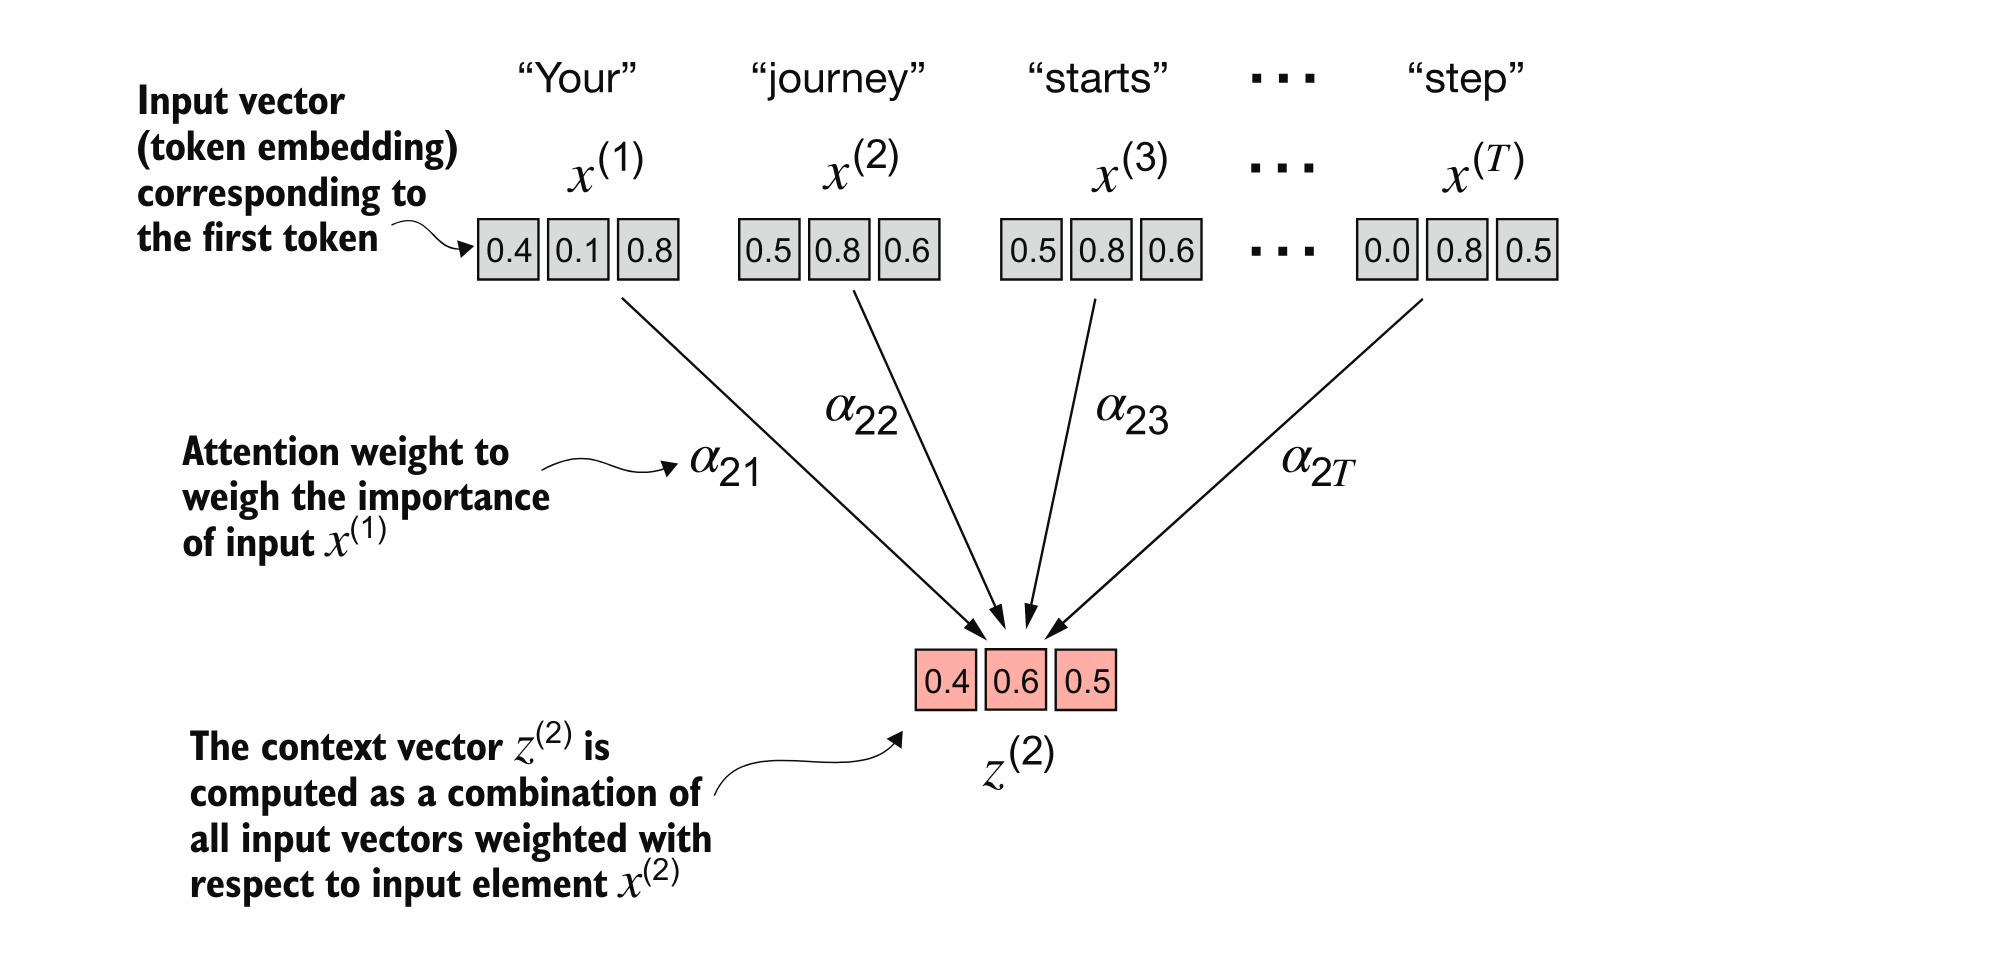



* Here we have an **input vecor** that consist of token embedding, each token represent a word in a sentence, and denoted with: $x$ consisting $T$ elements, from $x^{(1)}$ to $x^{(T)}$.
* So each word in the sentence **"Your journey starts with one step."** represent an $x^{(i)}$ where $i$ is an element of the sequence $x$.
* Each input token is represented as 3-dimensionl embeddong vector.
* The goal during the self-attention process is to calculate the **Context Vector** $z$
* The context vector captures the **relevant information from the entire sequence** for a particular element, based on the attention mechanism. It allows the model to encode dependencies and relationships across the input sequence effectively.

* For example, in a sentence:

    The word **"Journey"** which is processed in this case $z^{(2)}$ in "Your journey starts with one step" would have a context vector that emphasizes information related to all other input words helping to clarify meaning and relations among words.
*




